<a href="https://colab.research.google.com/github/jpdeleon/quicklook/blob/main/notebook/examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run the next cell to install `quicklook` and its dependencies.

In [1]:
!python -m pip install -U quicklook-package

Check if quicklook is installed in your environment.

In [2]:
!python -m pip show quicklook-package

Name: quicklook-package
Version: 1.3
Summary: Quicklook lightcurve plot generator
Home-page: https://github.com/jpdeleon/quicklook
Author: 
Author-email: jpdeleon <jpdeleon.bsap@gmail.com>
License: 
Location: /ut3/jerome/miniconda3/envs/ql/lib/python3.11/site-packages
Editable project location: /raid_ut3/home/jerome/github/research/project/quicklook
Requires: aesthetic, astroplan, flammkuchen, lightkurve, loguru, matplotlib, numpy, pre-commit, reproject, transitleastsquares, wotan
Required-by: 


If you're running this in Google colab, then you might need to restart the kernel before you can import the `quicklook` module successfully.

## Example 1 - Planet around a Sun-like star 

`quicklook` takes advantage of the [transit method](https://exoplanets.nasa.gov/alien-worlds/ways-to-find-a-planet/#/2) to find planet candidates. 

Let's see the TESS lightcurve for WASP-21 and see whether the pipeline can detect the transiting planet [WASP-21b](https://exoplanets.nasa.gov/exoplanet-catalog/5375/wasp-21-b/). Depending on the number of cores in your machine, the cell below will typically take between 10 seconds and a few minutes. 

In [3]:
%matplotlib inline
#import the TessQuickLook class inside the quicklook package
from quicklook import TessQuickLook

#initialize the class by simply supplying the target name
planet = TessQuickLook(target_name="WASP-21")

2025-05-14 06:54:16.534 | INFO     | quicklook.tql:__init__:97 - Generating quicklook for WASP-21...


Catalog names:
	TIC 436478932
	1SWASP J230958.23+182346.0
	2MASS J23095825+1823459
	APASS 44839944
	Gaia DR2 2831084391023184128
	SDSS DR9 1237679502703067218
	Tangra
	TOI-5963
	UCAC4 542-146716
	WASP-21
	WISE J230958.26+182346.1


2025-05-14 06:54:25.043 | INFO     | quicklook.tql:get_simbad_obj_type:366 - Simbad classifies WASP-21 as *=Star!


All available lightcurves:
      author         mission  t_exptime
0       SPOC  TESS Sector 56       20.0
1       SPOC  TESS Sector 56      120.0
2       SPOC  TESS Sector 83       20.0
3       SPOC  TESS Sector 83      120.0
4  TESS-SPOC  TESS Sector 56      200.0
5        QLP  TESS Sector 56      200.0
6        QLP  TESS Sector 83      600.0
Available sectors: [56, 83]


2025-05-14 06:54:27.879 | INFO     | quicklook.tql:get_lc:479 - Downloading SPOC lc...
2025-05-14 06:54:30.123 | INFO     | quicklook.tql:get_lc:490 - Downloaded SPOC (exp=10 s) lc in sector 83.
2025-05-14 06:54:30.138 | INFO     | quicklook.tql:get_toi_ephem:632 - Querying ephemeris for WASP-21:
2025-05-14 06:54:30.141 | INFO     | quicklook.tql:flatten_raw_lc:744 - Using wotan's biweight method to flatten raw lc.


Parameters for TIC 436478932.01:
epoch: 2459826.311145, 0.0004323943 d
per: 4.32262294185784, 0.00011471372 d
dur: 3.36990246699019, 0.034073763 hr
Transit Least Squares TLS 1.32 (5 Apr 2024)
Creating model cache for 37 durations
Searching 17185 data points, 2214 periods from 0.601 to 12.359 days
Using all 128 CPU threads


100%|██████████| 2214/2214 periods | 00:07<00:00


Searching for best T0 for period 4.31953 days


Above is the log when initializing the target. It shows that this target was observed by TESS in [sector 56](https://tess.mit.edu/observations/) in 2022, and there are many flavors of light curves available for this target: SPOC, TESS-SPOC, QLP. By default, `ql` chooses the lightcurve from the most recent sector created by the SPOC pipeline.

2025-05-14 06:54:39.874 | INFO     | quicklook.tql:plot_tql:1043 - Creating panels...
2025-05-14 06:54:39.923 | INFO     | quicklook.tql:plot_tql:1047 - Plotting raw light curve...
2025-05-14 06:54:39.930 | INFO     | quicklook.tql:plot_tql:1052 - Plotting trend...
2025-05-14 06:54:39.935 | INFO     | quicklook.tql:plot_tql:1057 - Running Lomb-Scargle periodogram...
2025-05-14 06:54:40.033 | INFO     | quicklook.tql:init_gls:724 - Estimating rotation period using Generalized Lomb-Scargle (GLS) periodogram...
2025-05-14 06:54:41.411 | INFO     | quicklook.tql:plot_tql:1095 - Appending TLS results...
2025-05-14 06:54:41.412 | INFO     | quicklook.tql:plot_tql:1099 - Plotting phase-folded light curve...
2025-05-14 06:54:41.504 | INFO     | quicklook.tql:plot_tql:1137 - Plotting TLS periodogram...
2025-05-14 06:54:41.510 | INFO     | quicklook.tql:plot_tql:1147 - Plotting flattened light curve...


Generalized LS - statistical output
-----------------------------------
Number of input points:      16723
Weighted mean of dataset:   1.000050
Weighted rms of dataset:    0.001794
Time base:                  24.919415
Number of frequency points:   2472

Maximum power p [ZK]: 0.004398
RMS of residuals:     0.001790
  Mean weighted internal error:  0.001707
Best sine frequency:  0.112362 +/- 0.004799
Best sine period:     8.899791 +/- 0.380136
Amplitude:            0.000170 +/- 0.000020
-----------------------------------


2025-05-14 06:54:41.520 | INFO     | quicklook.tql:plot_tql:1158 - Plotting TPF...
2025-05-14 06:54:42.030 | INFO     | quicklook.tql:get_tpf:569 - Using SPOC TPF...


All available TPFs:
      author         mission  t_exptime
0       SPOC  TESS Sector 56       20.0
1       SPOC  TESS Sector 56      120.0
2       SPOC  TESS Sector 83       20.0
3       SPOC  TESS Sector 83      120.0
4  TESS-SPOC  TESS Sector 56      200.0


2025-05-14 06:54:42.686 | INFO     | quicklook.tql:get_tpf:580 - Downloading TPF...
2025-05-14 06:55:04.065 | INFO     | quicklook.tql:get_tpf:590 - Downloaded SPOC (exp=20.0 s) TPF in sector 83.
2025-05-14 06:55:04.068 | INFO     | quicklook.tql:plot_tql:1180 - Querying DSS data...


Plotting nearby Gaia sources on survey image.
Querying Gaia sources around the target.
Querying dss1 (2.18 arcmin x 2.18 arcmin) archival image...


2025-05-14 06:55:06.548 | INFO     | quicklook.tql:plot_tql:1227 - Plotting odd-even transit...
2025-05-14 06:55:11.698 | INFO     | quicklook.tql:plot_tql:1234 - Plotting secondary eclipse...
2025-05-14 06:55:14.152 | INFO     | quicklook.tql:plot_tql:1241 - Plotting summary panel...
2025-05-14 06:55:14.154 | INFO     | quicklook.tql:plot_tql:1279 - #----------Runtime: 57.62 s----------#



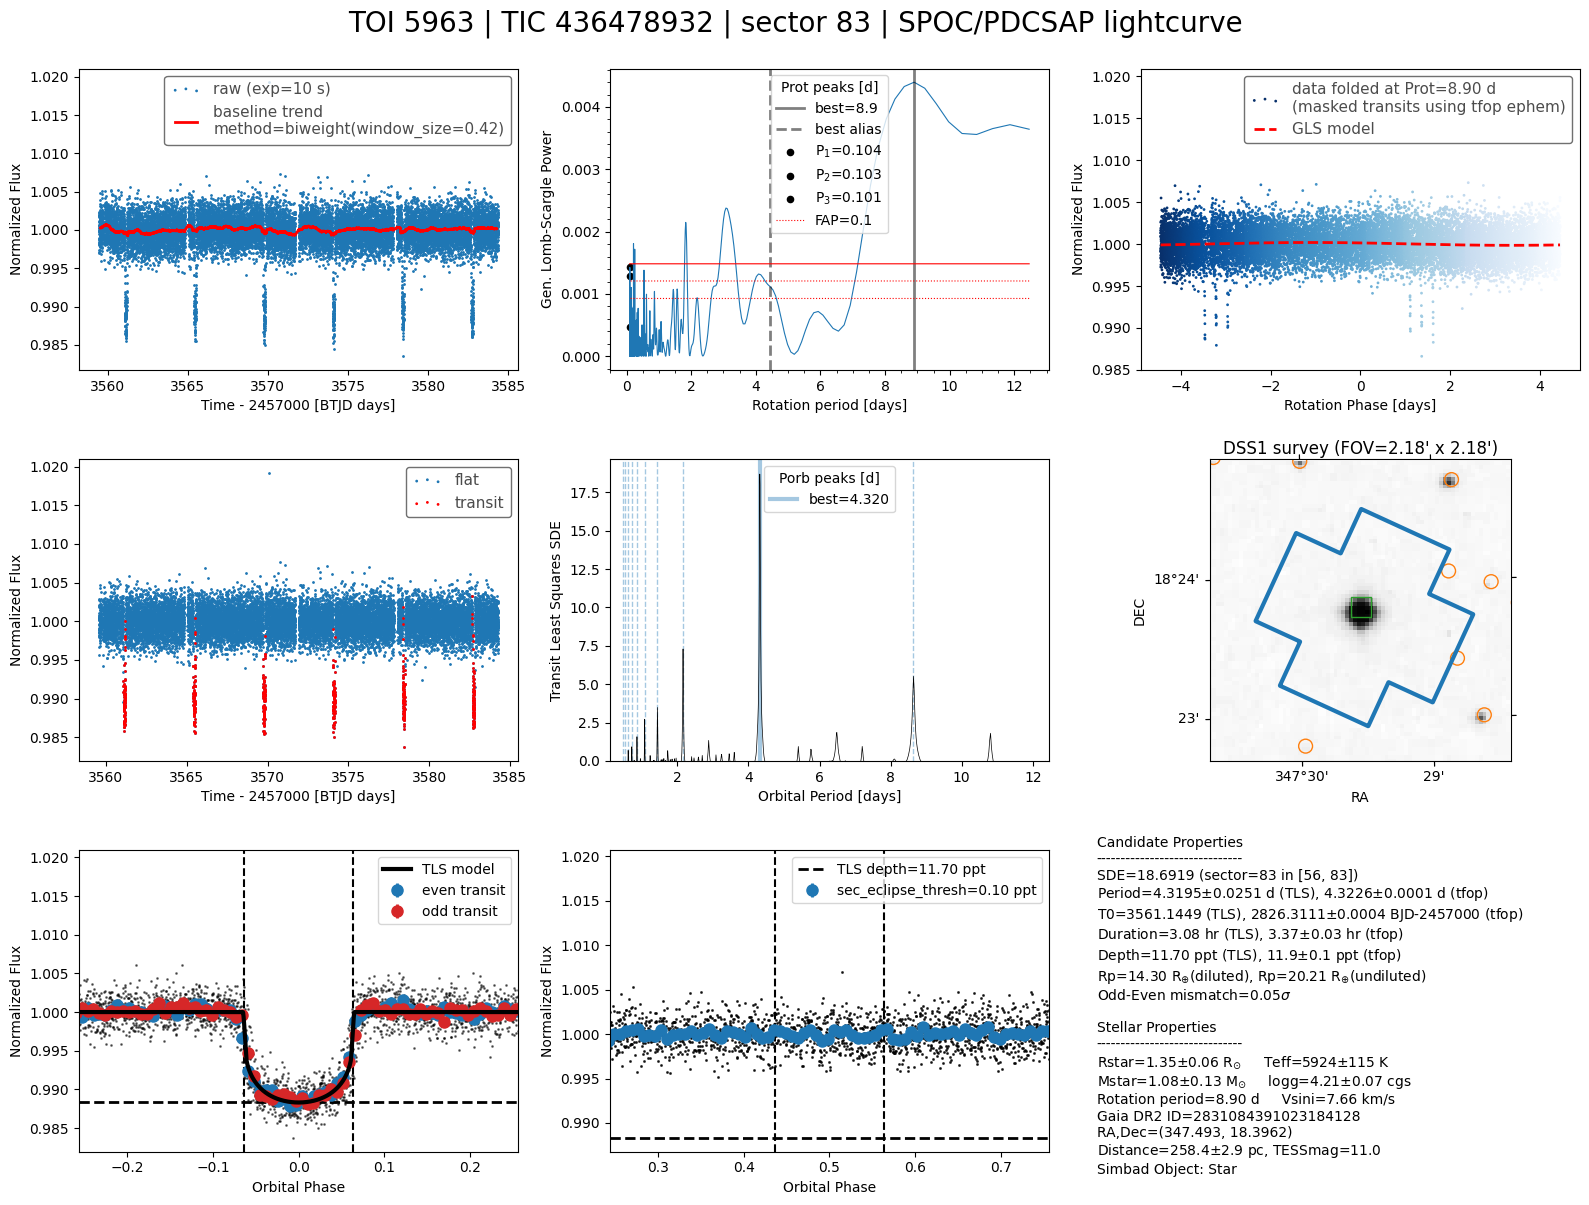

In [4]:
fig = planet.plot_tql()

The figure above shows 9 panels. Let's break them down.
* top row
  - left (panel 1): raw lightcurve (blue marker) and trend (red line)
  - middle (panel 2): [Lomb-Scargle periodogram](https://docs.astropy.org/en/stable/timeseries/lombscargle.html) used to estimate the star's rotation period; this is useful to find active and variable stars
  - right (panel 3): raw lightcurve phase-folded at the computed peak of Lomb-Scargle periodogram (corresponding to the stellar rotation period) from panel 1; 
* middle row
  - left (panel 4): flattened lightcurve and detected transits (determined from the TLS periodogram on panel 5)
  - middle (panel 5): periodogram using the [transit least squares](https://ui.adsabs.harvard.edu/abs/2019A%26A...623A..39H/abstract) (TLS) algorithm
  - right (panel 6): TESS aperture (blue polygon) and annotated Gaia sources (orange and red markers) overlaid on archival [DSS](https://archive.stsci.edu/cgi-bin/dss_form) image centered on the target; this is useful to see if there are potential sources of the signal other than the target
* bottom row
  - left (panel 7): phase-folded lightcurve at the derived peak of TLS periodogram (corresponding to the orbital period); odd (red markers) and even transits (blue markers) and best-fit transit model (black line) are also shown 
  - middle (panel 8): phase-folded lightcurve zoomed at phase=0.5 to check for a secondary eclipse which is a strong indicator of a self-luminous companion such as an eclipsing binary or a high-albedo brown dwarf; the computed transit depth (dashed line) is shown for reference
  - right (panel 8): summary info about the star and (planet) candidate

Note that you can run the above code in the terminal using the `ql` script:
```
(my_env) $ ql -name "WASP-21" 
```

## Example 2 - Eclipsing Binary (EB)

Let's now see a random target (which turns out to be an eclipsing binary) given a specific [TESS Input Catalog](https://tess.mit.edu/science/tess-input-catalogue/) (TIC) ID. You can view more EBs [here](http://tessebs.villanova.edu/)

In [5]:
from quicklook import TessQuickLook

eb = TessQuickLook(target_name="TIC 144539611")

2025-05-14 06:55:19.678 | INFO     | quicklook.tql:__init__:97 - Generating quicklook for TIC 144539611...


Catalog names:
	TIC 144539611
	2MASS J03292286-2406034
	APASS 10176856
	Gaia DR2 5086152743542494592
	HIP 16247
	TYC 6446-00342-1
	UCAC4 330-003864
	WISE J032923.04-240602.1


2025-05-14 06:55:23.055 | INFO     | quicklook.tql:get_simbad_obj_type:360 - *********************************************
2025-05-14 06:55:23.056 | INFO     | quicklook.tql:get_simbad_obj_type:361 - Simbad classifies TIC 144539611 as SB*=Spectroscopic Binary!
2025-05-14 06:55:23.057 | INFO     | quicklook.tql:get_simbad_obj_type:364 - *********************************************


All available lightcurves:
              author         mission  t_exptime
0               SPOC  TESS Sector 04      120.0
1          TESS-SPOC  TESS Sector 04     1800.0
2                QLP  TESS Sector 04     1800.0
3                QLP  TESS Sector 31      600.0
4              TASOC  TESS Sector 04      120.0
5  GSFC-ELEANOR-LITE  TESS Sector 04     1800.0
6              TASOC  TESS Sector 04     1800.0
7              TASOC  TESS Sector 04     1800.0
8               TGLC  TESS Sector 04     1800.0
Available sectors: [4, 31]


2025-05-14 06:55:24.830 | INFO     | quicklook.tql:get_lc:479 - Downloading SPOC lc...
2025-05-14 06:55:24.925 | INFO     | quicklook.tql:get_lc:490 - Downloaded SPOC (exp=20 s) lc in sector 4.
2025-05-14 06:55:24.941 | INFO     | quicklook.tql:flatten_raw_lc:744 - Using wotan's biweight method to flatten raw lc.


Transit Least Squares TLS 1.32 (5 Apr 2024)
Creating model cache for 37 durations
Searching 14389 data points, 2286 periods from 0.601 to 12.697 days
Using all 128 CPU threads


100%|██████████| 2286/2286 periods | 00:06<00:00


Searching for best T0 for period 1.99081 days


2025-05-14 06:55:33.579 | INFO     | quicklook.tql:plot_tql:1043 - Creating panels...
2025-05-14 06:55:33.630 | INFO     | quicklook.tql:plot_tql:1047 - Plotting raw light curve...
2025-05-14 06:55:33.639 | INFO     | quicklook.tql:plot_tql:1052 - Plotting trend...
2025-05-14 06:55:33.643 | INFO     | quicklook.tql:plot_tql:1057 - Running Lomb-Scargle periodogram...
2025-05-14 06:55:33.736 | INFO     | quicklook.tql:init_gls:724 - Estimating rotation period using Generalized Lomb-Scargle (GLS) periodogram...
2025-05-14 06:55:35.105 | ERROR    | quicklook.tql:plot_tql:1073 - GLS power is NaN, switching to astropy's Lomb-Scargle...


No output of frequency error.
Increase frequency range to sample the peak maximum.
Generalized LS - statistical output
-----------------------------------
Number of input points:      15701
Weighted mean of dataset:   nan
Weighted rms of dataset:    nan
Time base:                  25.947289
Number of frequency points:   2575

Maximum power p [ZK]: nan
RMS of residuals:     nan
  Mean weighted internal error:  nan
Best sine frequency:  0.077079 +/- nan
Best sine period:     12.973644 +/- nan
Amplitude:            nan +/- nan
-----------------------------------


2025-05-14 06:55:35.217 | INFO     | quicklook.tql:plot_tql:1095 - Appending TLS results...
2025-05-14 06:55:35.218 | INFO     | quicklook.tql:plot_tql:1099 - Plotting phase-folded light curve...
2025-05-14 06:55:35.303 | INFO     | quicklook.tql:plot_tql:1137 - Plotting TLS periodogram...
2025-05-14 06:55:35.311 | INFO     | quicklook.tql:plot_tql:1147 - Plotting flattened light curve...
2025-05-14 06:55:35.323 | INFO     | quicklook.tql:plot_tql:1158 - Plotting TPF...


lightkurve.Periodogram properties:
      Attribute         Description   Units
---------------------- -------------- -----
                nterms              1      
              targetid      144539611      
          default_view         period      
                 label  TIC 144539611      
             ls_method           fast      
frequency_at_max_power         1.0021 1 / d
             max_power         0.0175      
               nyquist       359.9992 1 / d
   period_at_max_power         0.9979     d
             frequency array (46060,) 1 / d
                period array (46060,)     d
                 power array (46060,)      
                  meta <class 'dict'>      
None


2025-05-14 06:55:35.796 | INFO     | quicklook.tql:get_tpf:569 - Using SPOC TPF...


All available TPFs:
      author         mission  t_exptime
0       SPOC  TESS Sector 04      120.0
1  TESS-SPOC  TESS Sector 04     1800.0


2025-05-14 06:55:36.283 | INFO     | quicklook.tql:get_tpf:580 - Downloading TPF...
2025-05-14 06:55:36.331 | INFO     | quicklook.tql:get_tpf:590 - Downloaded SPOC (exp=120.0 s) TPF in sector 4.
2025-05-14 06:55:36.332 | INFO     | quicklook.tql:plot_tql:1180 - Querying DSS data...


Plotting nearby Gaia sources on survey image.
Querying Gaia sources around the target.
Querying dss1 (2.38 arcmin x 2.38 arcmin) archival image...


2025-05-14 06:55:37.357 | INFO     | quicklook.tql:plot_tql:1227 - Plotting odd-even transit...
2025-05-14 06:55:39.678 | INFO     | quicklook.tql:plot_tql:1234 - Plotting secondary eclipse...
2025-05-14 06:55:40.903 | INFO     | quicklook.tql:plot_tql:1241 - Plotting summary panel...
2025-05-14 06:55:40.906 | INFO     | quicklook.tql:plot_tql:1279 - #----------Runtime: 21.23 s----------#



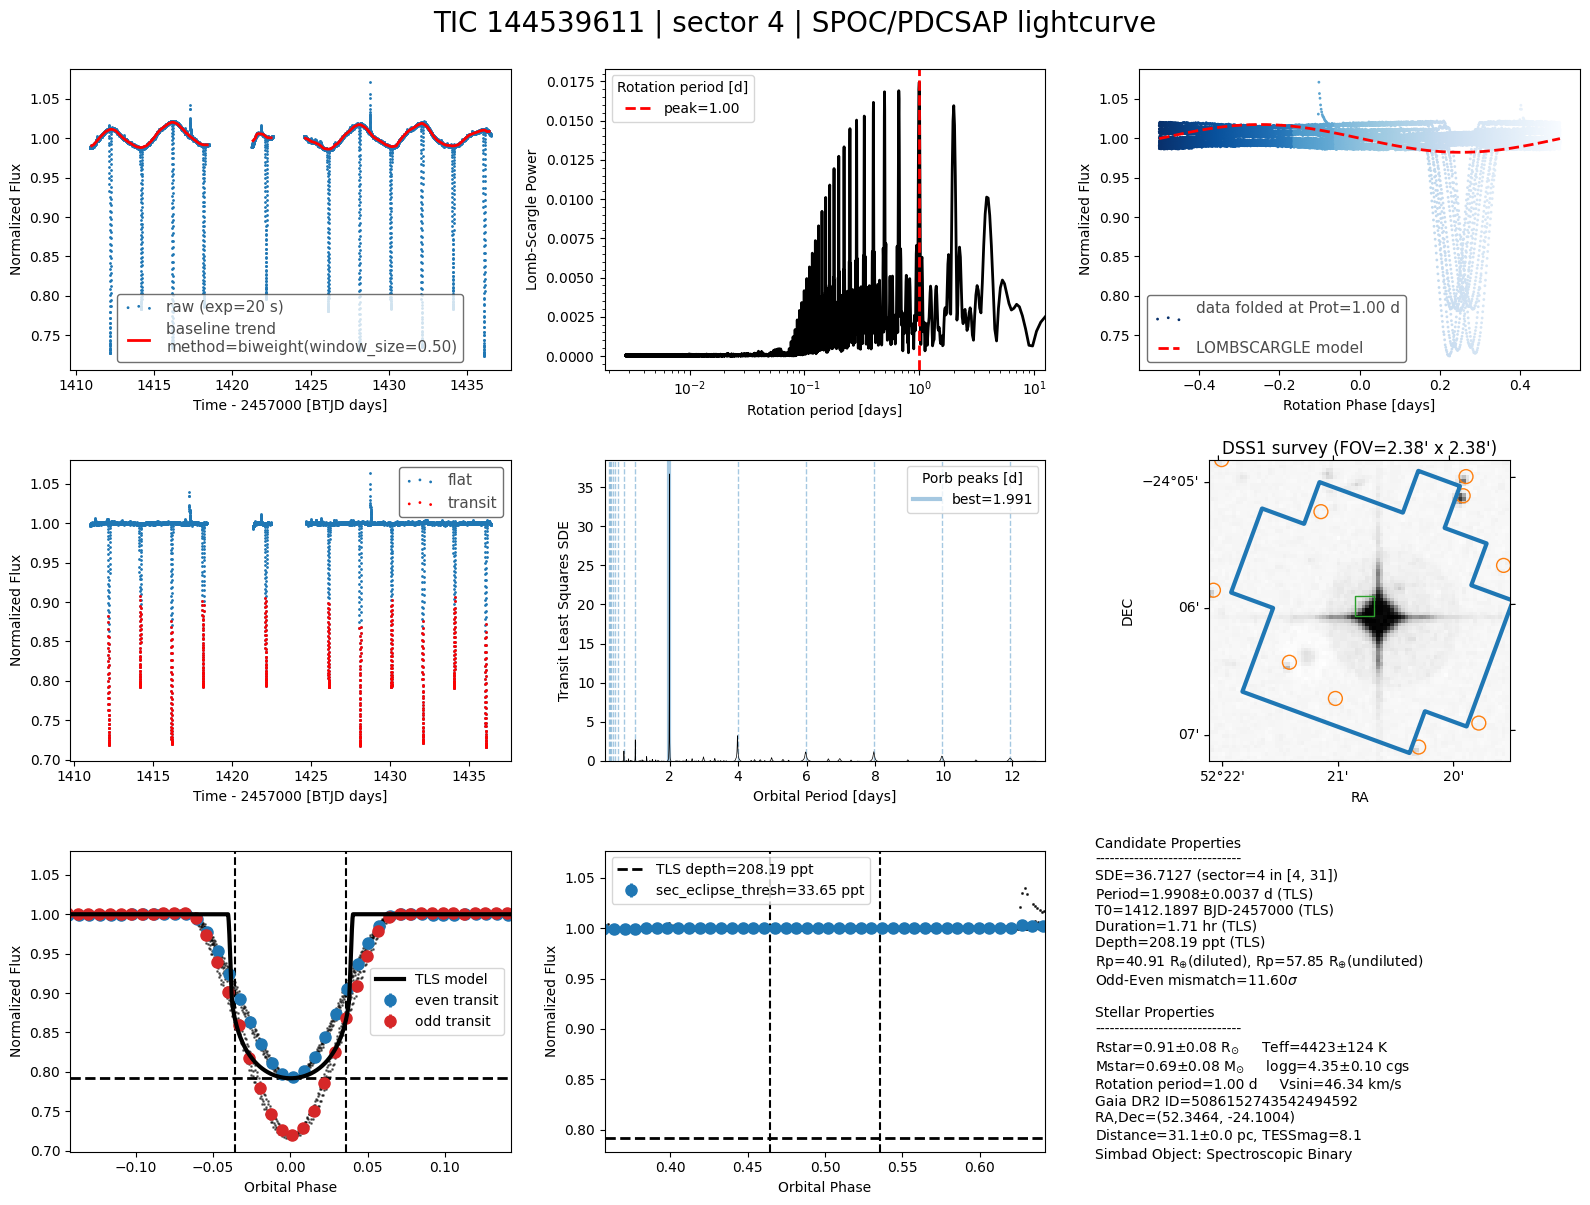

In [6]:
fig = eb.plot_tql()

The reason why this is an EB is because of the typical strong sinusoidal signal (called phase curve) seen in panel 1, the V-shaped signal, and the obvious difference in depth between in odd and even eclipses as seen in panel 7. The actual orbital period of the system is twice the period found by the pipeline:

In [7]:
eb.tls_results.period

1.9908051707342354

If we edit the orbital period:

In [8]:
eb.tls_results.period = 1.99*2

and plot again:

2025-05-14 06:55:45.879 | INFO     | quicklook.tql:plot_tql:1043 - Creating panels...
2025-05-14 06:55:45.927 | INFO     | quicklook.tql:plot_tql:1047 - Plotting raw light curve...
2025-05-14 06:55:45.933 | INFO     | quicklook.tql:plot_tql:1052 - Plotting trend...
2025-05-14 06:55:45.937 | INFO     | quicklook.tql:plot_tql:1057 - Running Lomb-Scargle periodogram...
2025-05-14 06:55:46.028 | INFO     | quicklook.tql:plot_tql:1095 - Appending TLS results...
2025-05-14 06:55:46.029 | INFO     | quicklook.tql:plot_tql:1099 - Plotting phase-folded light curve...
2025-05-14 06:55:46.108 | INFO     | quicklook.tql:plot_tql:1137 - Plotting TLS periodogram...
2025-05-14 06:55:46.115 | INFO     | quicklook.tql:plot_tql:1147 - Plotting flattened light curve...
2025-05-14 06:55:46.125 | INFO     | quicklook.tql:plot_tql:1158 - Plotting TPF...
2025-05-14 06:55:46.142 | INFO     | quicklook.tql:get_tpf:569 - Using SPOC TPF...
2025-05-14 06:55:46.142 | INFO     | quicklook.tql:get_tpf:580 - Download

lightkurve.Periodogram properties:
      Attribute         Description   Units
---------------------- -------------- -----
                nterms              1      
              targetid      144539611      
          default_view         period      
                 label  TIC 144539611      
             ls_method           fast      
frequency_at_max_power         1.0021 1 / d
             max_power         0.0175      
               nyquist       359.9992 1 / d
   period_at_max_power         0.9979     d
             frequency array (46060,) 1 / d
                period array (46060,)     d
                 power array (46060,)      
                  meta <class 'dict'>      
None
All available TPFs:
      author         mission  t_exptime
0       SPOC  TESS Sector 04      120.0
1  TESS-SPOC  TESS Sector 04     1800.0
Plotting nearby Gaia sources on survey image.
Querying Gaia sources around the target.
Querying dss1 (2.38 arcmin x 2.38 arcmin) archival image...


2025-05-14 06:55:47.138 | INFO     | quicklook.tql:plot_tql:1227 - Plotting odd-even transit...
2025-05-14 06:55:49.440 | INFO     | quicklook.tql:plot_tql:1234 - Plotting secondary eclipse...
2025-05-14 06:55:51.776 | INFO     | quicklook.tql:plot_tql:1241 - Plotting summary panel...
2025-05-14 06:55:51.778 | INFO     | quicklook.tql:plot_tql:1279 - #----------Runtime: 32.10 s----------#



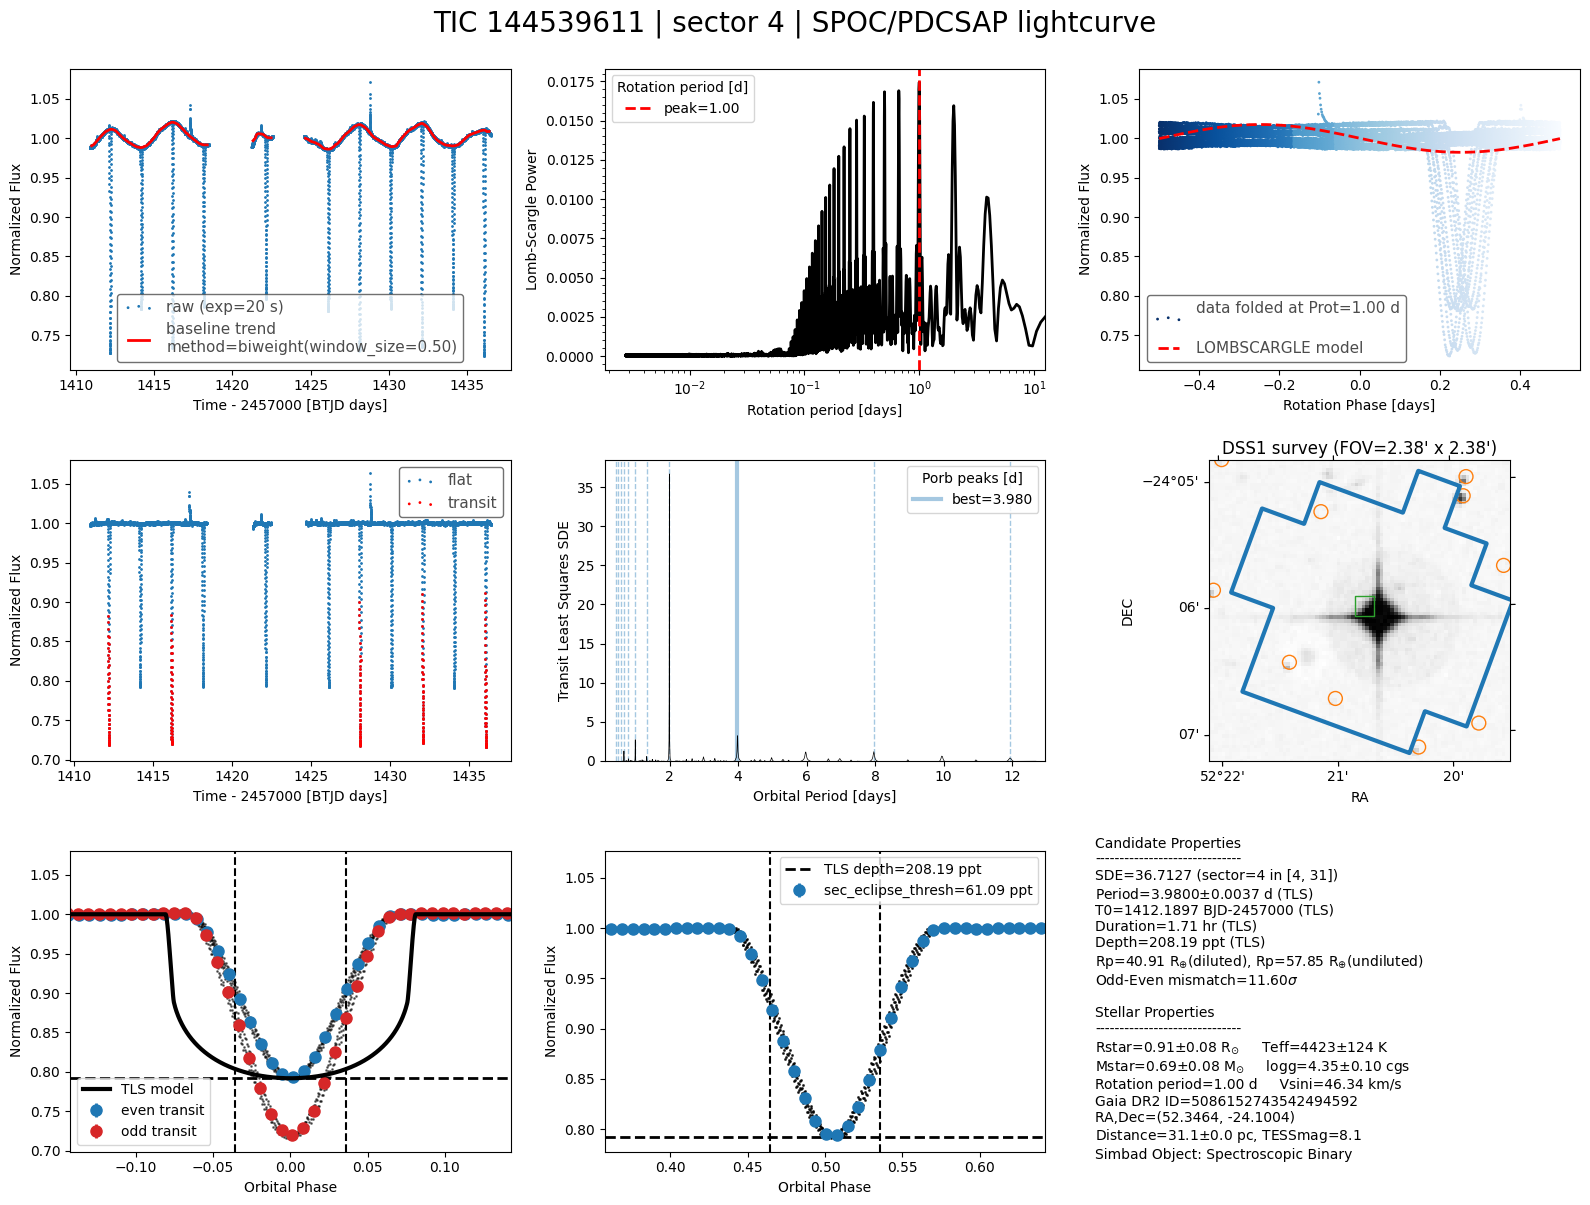

In [9]:
fig = eb.plot_tql()

Now we see in panel 4 that primary eclipse is highlighted correctly in red, and also in panel 8 the even/secondary eclipse is zoomed at phase=0.5.

## Example 3 - Brown dwarf

According to this [paper](https://arxiv.org/abs/1906.05048), EPIC 212036875 is a brown dwarf. Although the target was originally observed by the Kepler satellite during the K2 extended mission, it was later observed by TESS. 

In [10]:
bd = TessQuickLook(target_name="EPIC 212036875")

2025-05-14 06:55:56.406 | INFO     | quicklook.tql:__init__:97 - Generating quicklook for EPIC 212036875...


Catalog names:
	TIC 203214138
	2MASS J08584567+2052088
	APASS 45018986
	EPIC 212036875
	Gaia DR2 684893489523382144
	TOI-5081
	TYC 1400-01873-1
	TYC 1400-1873-1
	UCAC4 555-045746
	WISE J085845.66+205208.4


2025-05-14 06:56:00.846 | INFO     | quicklook.tql:get_simbad_obj_type:366 - Simbad classifies EPIC 212036875 as *=Star!


All available lightcurves:
       author         mission  t_exptime
0        SPOC  TESS Sector 44      120.0
1        SPOC  TESS Sector 45      120.0
2        SPOC  TESS Sector 46      120.0
3        SPOC  TESS Sector 72      120.0
4   TESS-SPOC  TESS Sector 44      600.0
5   TESS-SPOC  TESS Sector 45      600.0
6   TESS-SPOC  TESS Sector 46      600.0
7   TESS-SPOC  TESS Sector 72      200.0
8         QLP  TESS Sector 44      600.0
9         QLP  TESS Sector 45      600.0
10        QLP  TESS Sector 46      600.0
11        QLP  TESS Sector 72      200.0
Available sectors: [44, 45, 46, 72]


2025-05-14 06:56:02.406 | INFO     | quicklook.tql:get_lc:479 - Downloading SPOC lc...
2025-05-14 06:56:04.626 | INFO     | quicklook.tql:get_lc:490 - Downloaded SPOC (exp=20 s) lc in sector 72.
2025-05-14 06:56:04.648 | INFO     | quicklook.tql:get_toi_ephem:632 - Querying ephemeris for EPIC 212036875:
2025-05-14 06:56:04.651 | INFO     | quicklook.tql:flatten_raw_lc:744 - Using wotan's biweight method to flatten raw lc.


Parameters for TIC 203214138.01:
epoch: 2460280.381301, 0.0139915 d
per: 5.1699026, 3.11e-05 d
dur: 1.972, 0.094 hr
Transit Least Squares TLS 1.32 (5 Apr 2024)
Creating model cache for 37 durations
Searching 14408 data points, 2055 periods from 0.601 to 11.61 days
Using all 128 CPU threads


100%|██████████| 2055/2055 periods | 00:10<00:00


Searching for best T0 for period 5.16799 days


100%|██████████| 11344/11344 [00:01<00:00, 5859.80it/s]


2025-05-14 06:56:18.462 | INFO     | quicklook.tql:plot_tql:1043 - Creating panels...
2025-05-14 06:56:18.507 | INFO     | quicklook.tql:plot_tql:1047 - Plotting raw light curve...
2025-05-14 06:56:18.526 | INFO     | quicklook.tql:plot_tql:1052 - Plotting trend...
2025-05-14 06:56:18.530 | INFO     | quicklook.tql:plot_tql:1057 - Running Lomb-Scargle periodogram...
2025-05-14 06:56:18.625 | INFO     | quicklook.tql:init_gls:724 - Estimating rotation period using Generalized Lomb-Scargle (GLS) periodogram...
2025-05-14 06:56:20.069 | ERROR    | quicklook.tql:plot_tql:1073 - GLS power is NaN, switching to astropy's Lomb-Scargle...


No output of frequency error.
Increase frequency range to sample the peak maximum.
Generalized LS - statistical output
-----------------------------------
Number of input points:      17528
Weighted mean of dataset:   nan
Weighted rms of dataset:    nan
Time base:                  25.324571
Number of frequency points:   2513

Maximum power p [ZK]: nan
RMS of residuals:     nan
  Mean weighted internal error:  nan
Best sine frequency:  0.078737 +/- nan
Best sine period:     12.700483 +/- nan
Amplitude:            nan +/- nan
-----------------------------------


2025-05-14 06:56:20.614 | INFO     | quicklook.tql:plot_tql:1095 - Appending TLS results...
2025-05-14 06:56:20.615 | INFO     | quicklook.tql:plot_tql:1099 - Plotting phase-folded light curve...
2025-05-14 06:56:20.708 | INFO     | quicklook.tql:plot_tql:1137 - Plotting TLS periodogram...
2025-05-14 06:56:20.714 | INFO     | quicklook.tql:plot_tql:1147 - Plotting flattened light curve...
2025-05-14 06:56:20.724 | INFO     | quicklook.tql:plot_tql:1158 - Plotting TPF...


lightkurve.Periodogram properties:
      Attribute         Description   Units
---------------------- -------------- -----
                nterms              1      
              targetid      203214138      
          default_view         period      
                 label  TIC 203214138      
             ls_method           fast      
frequency_at_max_power         0.3799 1 / d
             max_power         0.0001      
               nyquist       359.9667 1 / d
   period_at_max_power         2.6325     d
             frequency array (42006,) 1 / d
                period array (42006,)     d
                 power array (42006,)      
                  meta <class 'dict'>      
None


2025-05-14 06:56:21.589 | INFO     | quicklook.tql:get_tpf:569 - Using SPOC TPF...


All available TPFs:
      author         mission  t_exptime
0       SPOC  TESS Sector 44      120.0
1       SPOC  TESS Sector 45      120.0
2       SPOC  TESS Sector 46      120.0
3       SPOC  TESS Sector 72      120.0
4  TESS-SPOC  TESS Sector 44      600.0
5  TESS-SPOC  TESS Sector 45      600.0
6  TESS-SPOC  TESS Sector 46      600.0
7  TESS-SPOC  TESS Sector 72      200.0


2025-05-14 06:56:22.195 | INFO     | quicklook.tql:get_tpf:580 - Downloading TPF...
2025-05-14 06:56:27.572 | INFO     | quicklook.tql:get_tpf:590 - Downloaded SPOC (exp=120.0 s) TPF in sector 72.
2025-05-14 06:56:27.573 | INFO     | quicklook.tql:plot_tql:1180 - Querying DSS data...


Plotting nearby Gaia sources on survey image.
Querying Gaia sources around the target.
Querying dss1 (2.18 arcmin x 2.18 arcmin) archival image...


2025-05-14 06:56:31.532 | INFO     | quicklook.tql:plot_tql:1227 - Plotting odd-even transit...
2025-05-14 06:56:37.393 | INFO     | quicklook.tql:plot_tql:1234 - Plotting secondary eclipse...
2025-05-14 06:56:40.424 | INFO     | quicklook.tql:plot_tql:1241 - Plotting summary panel...
2025-05-14 06:56:40.427 | INFO     | quicklook.tql:plot_tql:1279 - #----------Runtime: 44.02 s----------#



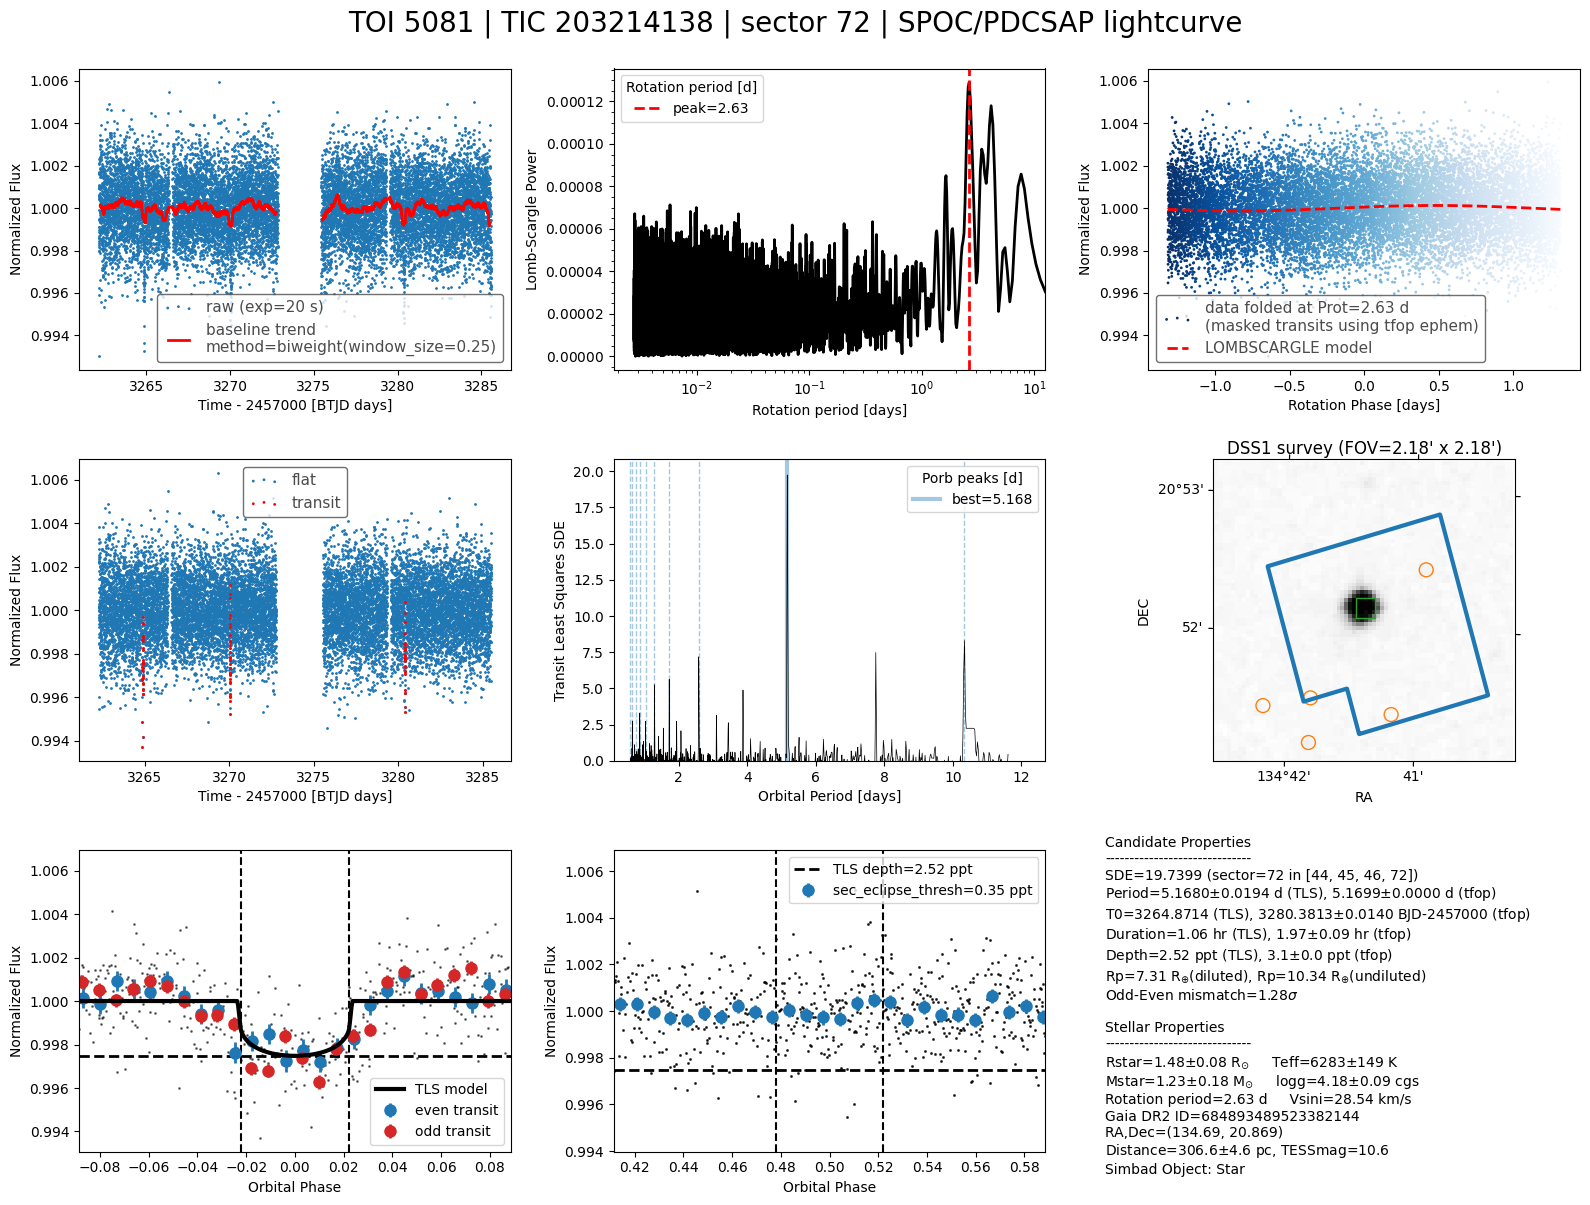

In [11]:
fig = bd.plot_tql()

The paper claims the brown dwarf orbits the star every 5.17 days which is very close to the value we found, shown in panel 5.

## Example 4 - survivor planet around a white dwarf (WD)

According to this NASA article, `WD 1856+534` is a white dwarf hosting a planet that somehow survived its full life cycle.

In [12]:
#wd = TessQuickLook(target_name="WD 1856+534") #`ql` cannot find the target using this name
wd = TessQuickLook(target_name="TIC 267574918") #https://www.nature.com/articles/s41586-020-2713-y identifies the TIC ID

2025-05-14 06:56:46.186 | INFO     | quicklook.tql:__init__:97 - Generating quicklook for TIC 267574918...


Catalog names:
	TIC 267574918
	2MASS J18573936+5330332
	Gaia DR2 2146576589564898688
	LP 141-14
	LSPM J1857+5330
	NLTT 47263
	TOI-1690
	WD 1856+534
	WISE J185739.62+533032.9


2025-05-14 06:56:50.215 | INFO     | quicklook.tql:get_simbad_obj_type:366 - Simbad classifies TIC 267574918 as WD*=White Dwarf!


All available lightcurves:
       author         mission  t_exptime
0        SPOC  TESS Sector 19      120.0
1        SPOC  TESS Sector 15      120.0
2        SPOC  TESS Sector 14      120.0
3        SPOC  TESS Sector 26      120.0
4        SPOC  TESS Sector 22      120.0
5        SPOC  TESS Sector 41       20.0
6        SPOC  TESS Sector 40       20.0
7        SPOC  TESS Sector 40      120.0
8        SPOC  TESS Sector 41      120.0
9        SPOC  TESS Sector 59       20.0
10       SPOC  TESS Sector 56       20.0
11       SPOC  TESS Sector 55       20.0
12       SPOC  TESS Sector 53       20.0
13       SPOC  TESS Sector 49       20.0
14       SPOC  TESS Sector 54       20.0
15       SPOC  TESS Sector 59      120.0
16       SPOC  TESS Sector 56      120.0
17       SPOC  TESS Sector 55      120.0
18       SPOC  TESS Sector 49      120.0
19       SPOC  TESS Sector 54      120.0
20       SPOC  TESS Sector 53      120.0
21       SPOC  TESS Sector 73       20.0
22       SPOC  TESS Sector 73 

2025-05-14 06:56:54.864 | INFO     | quicklook.tql:get_lc:479 - Downloading SPOC lc...
2025-05-14 06:56:57.093 | INFO     | quicklook.tql:get_lc:490 - Downloaded SPOC (exp=20 s) lc in sector 86.
2025-05-14 06:56:57.115 | INFO     | quicklook.tql:get_toi_ephem:632 - Querying ephemeris for TIC 267574918:
2025-05-14 06:56:57.118 | INFO     | quicklook.tql:flatten_raw_lc:744 - Using wotan's biweight method to flatten raw lc.


Parameters for TIC 267574918.01:
epoch: 2459419.987351, 0.03462824 d
per: 1.40793693333245, 3.3866268e-06 d
dur: 0.306353056989598, 0.024809992 hr
Transit Least Squares TLS 1.32 (5 Apr 2024)
Creating model cache for 38 durations
Searching 10328 data points, 2390 periods from 0.601 to 13.181 days
Using all 128 CPU threads


100%|██████████| 2390/2390 periods | 00:07<00:00


Searching for best T0 for period 1.40826 days


100%|██████████| 5737/5737 [00:00<00:00, 6217.82it/s]
/ut3/jerome/miniconda3/envs/ql/lib/python3.11/site-packages/transitleastsquares/main.py:411: UserWarning: 8 of 18 transits without data. The true period may be twice the given period.
  warnings.warn(text)


2025-05-14 06:57:06.727 | INFO     | quicklook.tql:plot_tql:1043 - Creating panels...
2025-05-14 06:57:06.774 | INFO     | quicklook.tql:plot_tql:1047 - Plotting raw light curve...
2025-05-14 06:57:06.780 | INFO     | quicklook.tql:plot_tql:1052 - Plotting trend...
2025-05-14 06:57:06.783 | INFO     | quicklook.tql:plot_tql:1057 - Running Lomb-Scargle periodogram...
2025-05-14 06:57:06.880 | INFO     | quicklook.tql:init_gls:724 - Estimating rotation period using Generalized Lomb-Scargle (GLS) periodogram...
2025-05-14 06:57:08.400 | ERROR    | quicklook.tql:plot_tql:1073 - GLS power is NaN, switching to astropy's Lomb-Scargle...
/ut3/jerome/miniconda3/envs/ql/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
2025-05-14 06:57:08.477 | INFO     | quicklook.tql:plot_tql:1095 - Appending TLS results...
2025-05-14 06:57:08.479 | INFO     | quicklook.tql:plot_t

No output of frequency error.
Increase frequency range to sample the peak maximum.
Generalized LS - statistical output
-----------------------------------
Number of input points:      17642
Weighted mean of dataset:   nan
Weighted rms of dataset:    nan
Time base:                  26.564732
Number of frequency points:   2637

Maximum power p [ZK]: nan
RMS of residuals:     nan
  Mean weighted internal error:  nan
Best sine frequency:  0.075288 +/- nan
Best sine period:     13.282366 +/- nan
Amplitude:            nan +/- nan
-----------------------------------
lightkurve.Periodogram properties:
      Attribute         Description   Units
---------------------- -------------- -----
                nterms              1      
              targetid      267574918      
          default_view         period      
                 label  TIC 267574918      
             ls_method           fast      
frequency_at_max_power           0.22 1 / d
             max_power         0.0661      
   

2025-05-14 06:57:08.565 | INFO     | quicklook.tql:plot_tql:1137 - Plotting TLS periodogram...
2025-05-14 06:57:08.574 | INFO     | quicklook.tql:plot_tql:1147 - Plotting flattened light curve...
2025-05-14 06:57:08.583 | INFO     | quicklook.tql:plot_tql:1158 - Plotting TPF...
2025-05-14 06:57:11.630 | INFO     | quicklook.tql:get_tpf:569 - Using SPOC TPF...


All available TPFs:
       author         mission  t_exptime
0        SPOC  TESS Sector 19      120.0
1        SPOC  TESS Sector 15      120.0
2        SPOC  TESS Sector 14      120.0
3        SPOC  TESS Sector 26      120.0
4        SPOC  TESS Sector 22      120.0
5        SPOC  TESS Sector 41       20.0
6        SPOC  TESS Sector 40       20.0
7        SPOC  TESS Sector 40      120.0
8        SPOC  TESS Sector 41      120.0
9        SPOC  TESS Sector 59       20.0
10       SPOC  TESS Sector 56       20.0
11       SPOC  TESS Sector 55       20.0
12       SPOC  TESS Sector 53       20.0
13       SPOC  TESS Sector 49       20.0
14       SPOC  TESS Sector 54       20.0
15       SPOC  TESS Sector 59      120.0
16       SPOC  TESS Sector 56      120.0
17       SPOC  TESS Sector 55      120.0
18       SPOC  TESS Sector 49      120.0
19       SPOC  TESS Sector 54      120.0
20       SPOC  TESS Sector 53      120.0
21       SPOC  TESS Sector 73       20.0
22       SPOC  TESS Sector 73      12

2025-05-14 06:57:12.277 | INFO     | quicklook.tql:get_tpf:580 - Downloading TPF...
2025-05-14 06:57:36.674 | INFO     | quicklook.tql:get_tpf:590 - Downloaded SPOC (exp=20.0 s) TPF in sector 86.
2025-05-14 06:57:36.676 | INFO     | quicklook.tql:plot_tql:1180 - Querying DSS data...


Plotting nearby Gaia sources on survey image.
Querying Gaia sources around the target.
Querying dss1 (2.18 arcmin x 2.18 arcmin) archival image...


2025-05-14 06:57:40.253 | INFO     | quicklook.tql:plot_tql:1227 - Plotting odd-even transit...
2025-05-14 06:57:41.942 | INFO     | quicklook.tql:plot_tql:1234 - Plotting secondary eclipse...
2025-05-14 06:57:42.993 | INFO     | quicklook.tql:plot_tql:1241 - Plotting summary panel...
2025-05-14 06:57:42.994 | ERROR    | quicklook.tql:make_summary_info:847 - float() argument must be a string or a real number, not 'NoneType'
2025-05-14 06:57:42.995 | ERROR    | quicklook.tql:make_summary_info:858 - float() argument must be a string or a real number, not 'NoneType'
2025-05-14 06:57:42.995 | ERROR    | quicklook.tql:make_summary_info:847 - float() argument must be a string or a real number, not 'NoneType'
2025-05-14 06:57:42.996 | ERROR    | quicklook.tql:make_summary_info:858 - float() argument must be a string or a real number, not 'NoneType'
2025-05-14 06:57:42.996 | ERROR    | quicklook.tql:make_summary_info:847 - float() argument must be a string or a real number, not 'NoneType'
2025

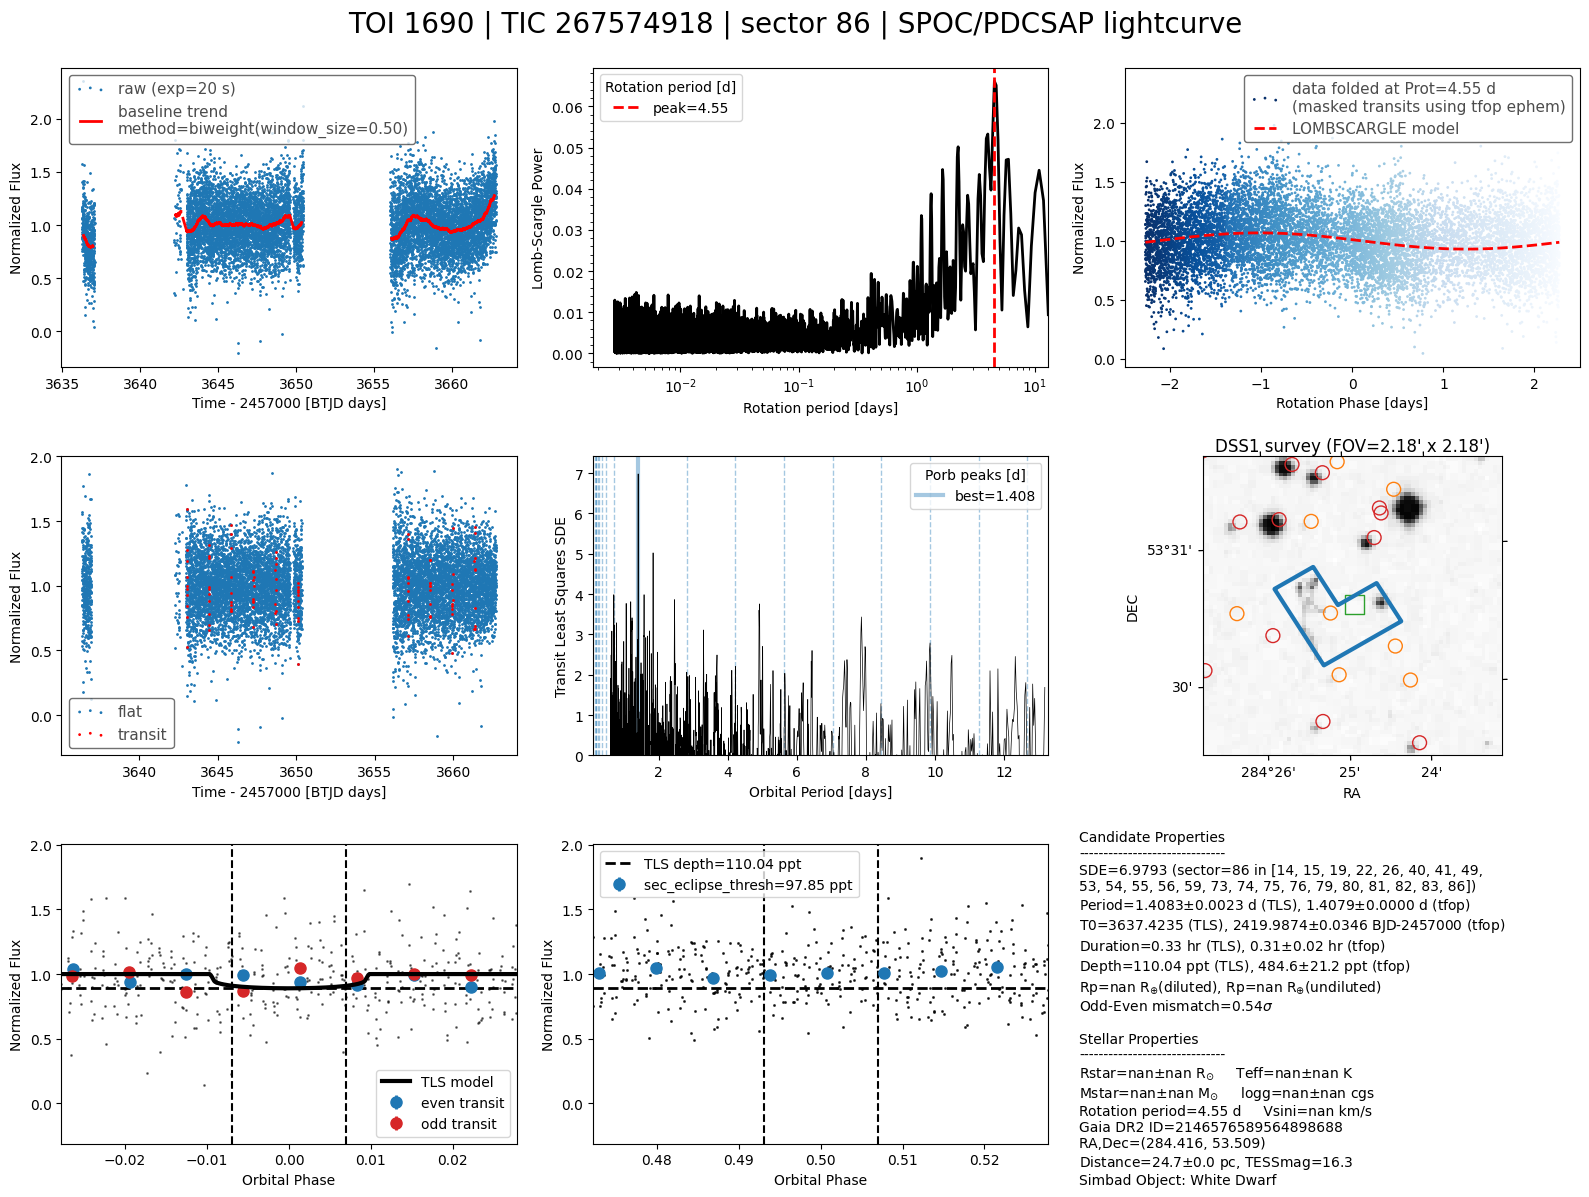

In [13]:
fig = wd.plot_tql()

The [paper](https://arxiv.org/abs/2009.07282) claims the survivor planet orbits the white dwarf every 1.4 days.

## Example 5 - Find a new transiting planet!

You can find your very own planet candidate using `quicklook`. You can focus on areas of the sky where people don't usually search for planets. For references, here's a [visualization](https://jpdeleon.github.io/toi-viz/) of all the planet candidates found by TESS (called TESS Object of Interest or TOI).

Please do notify [me](https://jpdeleon.github.io/aboutme/) when you find anything interesting with `quicklook`. Happy hunting!